In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving COVID clinical trials.csv to COVID clinical trials.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#load the file

df = pd.read_csv('COVID clinical trials.csv')
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [ ]:
print(df.info())          # Structure and data types
print(df.describe())      # Summary statistics for numerical columns
print(df.shape)           # Rows and columns
print(df.columns)         # Column names
print(df.isnull().sum())  # Missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

Checking missing data

Missing values:
 Series([], dtype: int64)


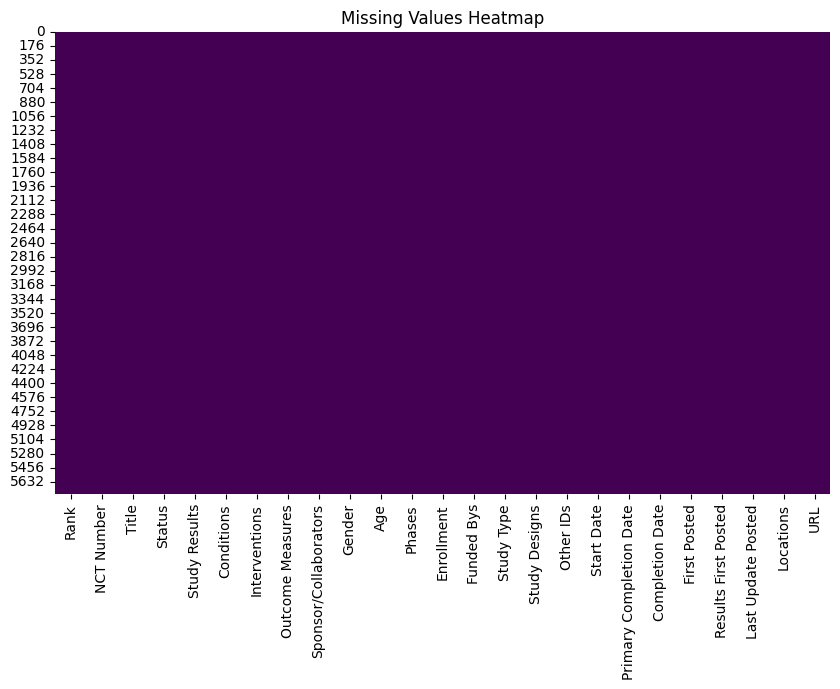

In [ ]:
# Count of missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:\n", missing)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Drop columns with too many missing values (e.g., > 50%)
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill missing values:
# - Use median for numbers
# - Use most frequent value (mode) for text

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Check if any missing values remain
print("Missing values left in each column:")
print(df.isnull().sum())


Missing values left in each column:
Rank                       0
NCT Number                 0
Title                      0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Results First Posted       0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64


UNIVARIATE ANALYSIS

In [ ]:
# Unique statuses and how many times each appears
status_counts = df['Status'].value_counts()
print(status_counts)


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


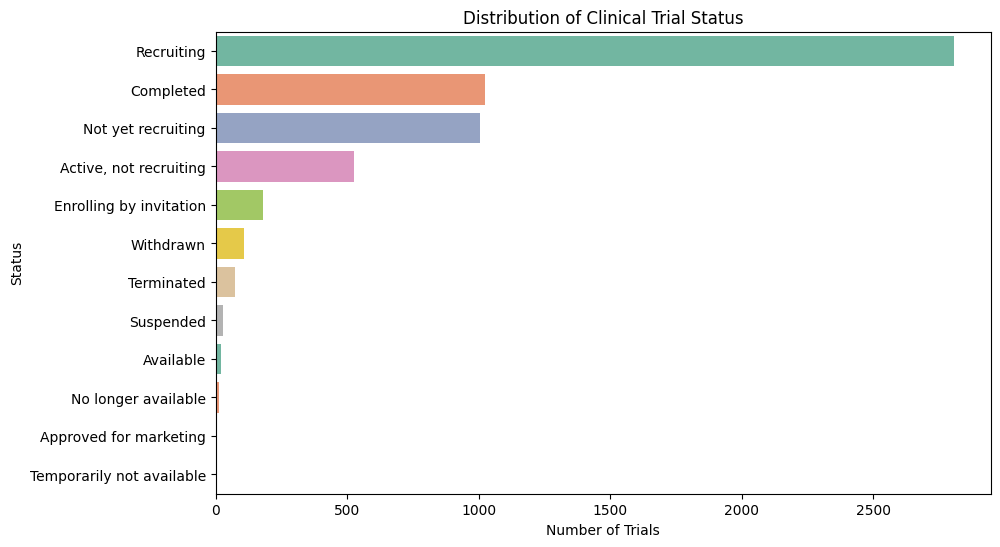

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Status', order=status_counts.index, palette='Set2')
plt.title('Distribution of Clinical Trial Status')
plt.xlabel('Number of Trials')
plt.ylabel('Status')
plt.show()


Phases
Not Applicable     3815
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

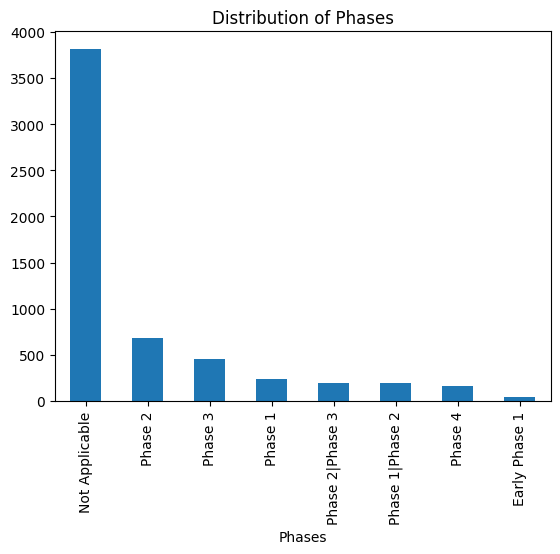

In [ ]:
#Understand the distribution of trial phases.
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',
title='Distribution of Phases')

Age
18 Years and older   (Adult, Older Adult)      2885
Child, Adult, Older Adult                       486
18 Years to 80 Years   (Adult, Older Adult)     221
18 Years to 65 Years   (Adult, Older Adult)     155
18 Years to 75 Years   (Adult, Older Adult)     135
                                               ... 
6 Years to 12 Years   (Child)                     1
15 Years to 19 Years   (Child, Adult)             1
up to 1 Year   (Child)                            1
21 Years to 45 Years   (Adult)                    1
8 Years to 20 Years   (Child, Adult)              1
Name: count, Length: 417, dtype: int64


<Axes: title={'center': 'Age Group Distribution'}, xlabel='Age'>

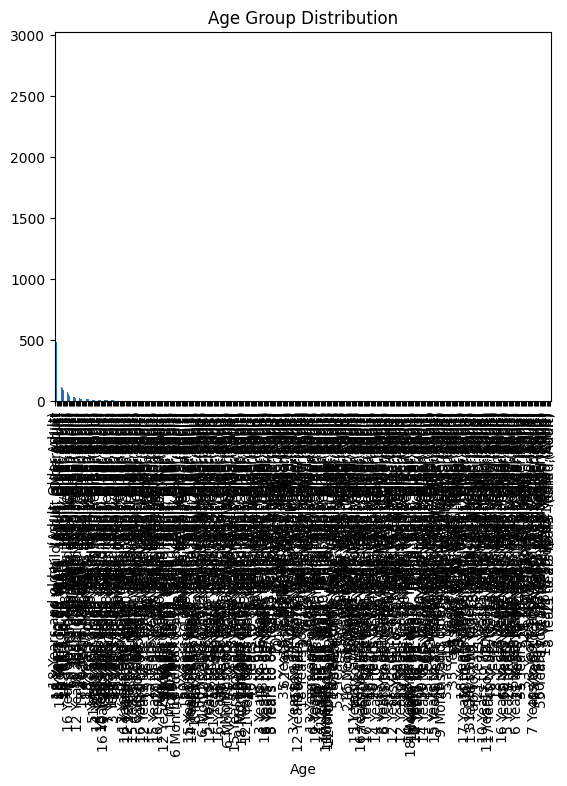

In [ ]:
#Analyze the distribution of age groups.
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='bar', title='Age Group Distribution')

Unique Status values:
 ['Active, not recruiting' 'Not yet recruiting' 'Recruiting'
 'Enrolling by invitation' 'Suspended' 'Completed' 'Withdrawn'
 'Terminated' 'No longer available' 'Available' 'Approved for marketing'
 'Temporarily not available']

Unique Phase values:
 ['Not Applicable' 'Phase 1|Phase 2' 'Early Phase 1' 'Phase 2|Phase 3'
 'Phase 1' 'Phase 4' 'Phase 2' 'Phase 3']
Phases                     Early Phase 1  Not Applicable  Phase 1  \
Status                                                              
Active, not recruiting                 7             286       44   
Approved for marketing                 0               2        0   
Available                              0              19        0   
Completed                              3             791       38   
Enrolling by invitation                4             150        1   
No longer available                    0              12        0   
Not yet recruiting                     5             632       4

<Axes: title={'center': 'Status vs. Phases'}, xlabel='Status'>

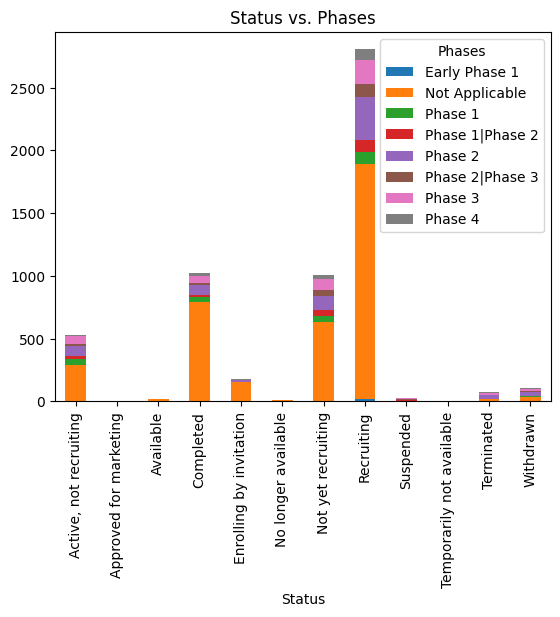

In [ ]:
print("Unique Status values:\n", df['Status'].unique())
print("\nUnique Phase values:\n", df['Phases'].unique())
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')


In [ ]:
#Understand the common outcome measures for different conditions.
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x)).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

Time series analysis

In [ ]:
# Convert to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Drop rows where Start Date couldn't be parsed
df = df.dropna(subset=['Start Date'])


In [ ]:
# Create new column for Year-Month
df['Start_Month'] = df['Start Date'].dt.to_period('M').astype(str)


In [ ]:
# Count number of trials started each month
monthly_counts = df['Start_Month'].value_counts().sort_index()

# Convert to DataFrame for plotting
monthly_df = monthly_counts.reset_index()
monthly_df.columns = ['Month', 'Trial_Count']


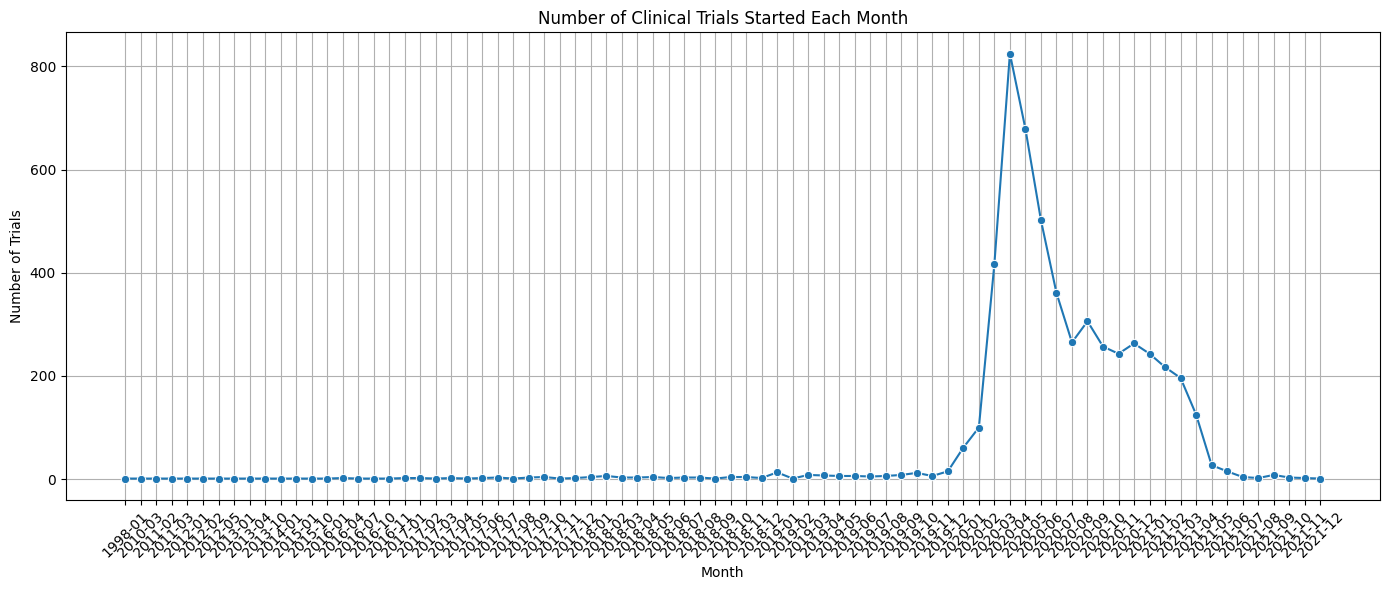

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_df, x='Month', y='Trial_Count', marker='o')
plt.title('Number of Clinical Trials Started Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


 📌 Key Insights
- Most trials were completed or in recruiting phase, showing successful progression despite urgency.

- Mid to late 2020 saw the highest surge in clinical trial launches in response to the pandemic.

- Higher phases had more completed trials, suggesting the maturity and robustness of those studies.

- Some early-phase trials were terminated or withdrawn, which is typical due to feasibility or early safety issues.